# Covid Status
This Data Science project by Sven Oberwalder and Yasin Sahin analyzes the development of the corona pandemic based on input data provided by Statistik Austria

The Datasets can be found here:
### [Dataset 1](https://data.statistik.gv.at/web/meta.jsp?dataset=OGD_covidggstatus2_GGSTATUS_2)

### [Dataset 2](https://data.statistik.gv.at/web/meta.jsp?dataset=OGD_covidggstatus_GGSTATUS_1)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Initial Data Analysis and Import
Dataset 1 has following attributes:
* **C-BEZIMST-0** Politischer Bezirk (PolBez)
* **C-ALTGRIMST-0** 10-years age group (Altersgr)
* **C-GLIMST-0** Country of Birth (GebLand)
* **C-C11-0** Sex (Geschl)
* **C-IMST-0** COVID-19 vaccinated-recovered-status (GeimpftGenesen)
* **F-DATA** Number of records (Anz)

Dataset 2 has following attributes:
* **C-B00-0** Federal country (Bundesland)
* **C-BILIMST-0** Education (Bildung)
* **C-ALTGRIMST-0** 10-years age group (Altersgr)
* **C-ESIMST-0** Economic status (ErwerbStatus)
* **C-IMST-0** COVID-19 vaccinated-recovered-status (GeimpftGenesen)
* **F-DATA** Number of records (Anz)

In below code, the datasets need to be imported and the attributes must be renamed to more meaningful names. Since the data is separated by semi-colons (;), we need to specify that when importing the csv-files. Furthermore, a simple Std-Analysis has to be conducted, to ensure the progress.

In [2]:
#import databases
dataset1 = pd.read_csv("./data/dataset1.csv", sep=";")
dataset2 = pd.read_csv("./data/dataset2.csv", sep=";")

#rename attributes
dataset1.rename(columns={"C-BEZIMST-0": "PolBez",
                         "C-ALTGRIMST-0": "Altersgr",
                         "C-GLIMST-0": "GebLand",
                         "C-C11-0": "Geschl",
                         "C-IMST-0": "GeimpftGenesen",
                         "F-DATA": "Anz"}, inplace=True)
dataset2.rename(columns={"C-B00-0": "Bundesland",
                         "C-BILIMST-0": "Bildung",
                         "C-ALTGRIMST-0": "Altersgr",
                         "C-ESIMST-0": "ErwerbStatus",
                         "C-IMST-0": "GeimpftGenesen",
                         "F-DATA": "Anz"}, inplace=True)


## Std-Analysis for Dataset 1

In [3]:
dataset1.sample(5)

,PolBez,Altersgr,GebLand,Geschl,GeimpftGenesen,Anz
51863,B00-5,ALTGRIMST-8,GLIMST-1,C11-2,IMST-1,4247
13907,BEZIMST-315,ALTGRIMST-7,GLIMST-2,C11-2,IMST-1,83
43371,BEZIMST-909,ALTGRIMST-2,GLIMST-2,C11-1,IMST-2,19
45757,BEZIMST-914,ALTGRIMST-13,GLIMST-2,C11-2,IMST-2,105
42154,BEZIMST-906,ALTGRIMST-8,GLIMST-2,C11-1,IMST-4,109


We immediately recognize that all values have a certain code (Except for Anz)

In [4]:
dataset1.head(5)

,PolBez,Altersgr,GebLand,Geschl,GeimpftGenesen,Anz
0,BEZIMST-101,ALTGRIMST-1,GLIMST-1,C11-1,IMST-1,1
1,BEZIMST-101,ALTGRIMST-1,GLIMST-1,C11-1,IMST-3,80
2,BEZIMST-101,ALTGRIMST-1,GLIMST-1,C11-1,IMST-4,216
3,BEZIMST-101,ALTGRIMST-1,GLIMST-1,C11-2,IMST-1,2
4,BEZIMST-101,ALTGRIMST-1,GLIMST-1,C11-2,IMST-3,86


In [5]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53961 entries, 0 to 53960
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   PolBez          53961 non-null  object
 1   Altersgr        53961 non-null  object
 2   GebLand         53961 non-null  object
 3   Geschl          53961 non-null  object
 4   GeimpftGenesen  53961 non-null  object
 5   Anz             53961 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 2.5+ MB


There are no null-values for this dataset, which is positive for future analysis.

In [6]:
dataset1.describe()

,Anz
count,53961.000000
mean,642.049703
std,2171.148389
min,1.000000
25%,44.000000
50%,169.000000
75%,508.000000
max,70338.000000


## Std-Analysis for Dataset 2

In [7]:
dataset2.sample(5)

,Bundesland,Bildung,Altersgr,ErwerbStatus,GeimpftGenesen,Anz
820,B00-6,BILIMST-2,ALT10IMST-5,ESIMST-2,IMST-2,1141
651,B00-5,BILIMST-2,ALT10IMST-4,ESIMST-1,IMST-3,6880
165,B00-2,BILIMST-1,ALT10IMST-5,ESIMST-2,IMST-4,1058
1032,B00-7,BILIMST-4,ALT10IMST-4,ESIMST-2,IMST-2,741
264,B00-2,BILIMST-4,ALT10IMST-6,ESIMST-1,IMST-3,1386


Same here: Every value is its own code and needs to be converted, to understand the dataset better.

In [8]:
dataset2.head(5)

,Bundesland,Bildung,Altersgr,ErwerbStatus,GeimpftGenesen,Anz
0,B00-1,BILIMST-1,ALT10IMST-4,ESIMST-1,IMST-1,611
1,B00-1,BILIMST-1,ALT10IMST-4,ESIMST-1,IMST-2,285
2,B00-1,BILIMST-1,ALT10IMST-4,ESIMST-1,IMST-3,396
3,B00-1,BILIMST-1,ALT10IMST-4,ESIMST-1,IMST-4,472
4,B00-1,BILIMST-1,ALT10IMST-4,ESIMST-2,IMST-1,471


In [9]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Bundesland      1404 non-null   object
 1   Bildung         1404 non-null   object
 2   Altersgr        1404 non-null   object
 3   ErwerbStatus    1404 non-null   object
 4   GeimpftGenesen  1404 non-null   object
 5   Anz             1404 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 65.9+ KB


No null-values in this dataset too.

In [10]:
dataset2.describe()

,Anz
count,1404.000000
mean,3414.423789
std,5746.310880
min,1.000000
25%,310.500000
50%,1375.500000
75%,3926.000000
max,55581.000000


# Data Cleaning
In this section, the input data will be cleaned. For this manner, any wrong, missing, or irrelevant informations will be treated accordingly.

**To Be marked**
The Column ``Altersgr`` uses an age gap interval of 10 years to inform us about the age of the adresses person. However, the first interval currently named ``ALT10IMST-1`` only has a 5 year gap (from 0 - 4 years) to especially adress babys and small children

### Dataset 1

There is already a csv which helps us convert these codes into values we can understand. The reason we do not import these values from the csv directly, is that the values are too long. We hereby keep the values steady and simple.
* ``GeimpftGenesen`` is converted into more meaningful names
* For ``Altersgr`` we type in the exact age group
* For ``GebLand``: ``GLIMST-1`` stands for people born in Austria, and ``GLIMST-1`` for people born outside of Austria
* ``Geschl`` is also being converted into m (male) and f (female)

In [11]:
geimpftGenesenDict = {"IMST-4": "NICHTS",  #nothing (NICHTS)
                       "IMST-1": "IMPF",  #vaccinated (geIMPFt)
                       "IMST-3": "GEN",  #recovered (GENesen)
                       "IMST-2": "IMPF + GEN"} #vaccinated + recovered (geIMPFt und GENesen)

ageGapDict = {"ALT10IMST-1": "0 - 4",
              "ALT10IMST-2": "5 - 14",
              "ALT10IMST-3": "15 - 24",
              "ALT10IMST-4": "25 - 34",
              "ALT10IMST-5": "35 - 44",
              "ALT10IMST-6": "45 - 54",
              "ALT10IMST-7": "55 - 64",
              "ALT10IMST-8": "65 - 74",
              "ALT10IMST-9": "75 - 84",
              "ALT10IMST-10": "85+"}

dataset1["GebLand"] = dataset1["GebLand"].map({"GLIMST-1": "INLAND",
                                               "GLIMST-2": "AUSLAND"})

dataset1["Geschl"] = dataset1["Geschl"].map({"C11-1": "m",
                                             "C11-2": "f"})

dataset1["GeimpftGenesen"] = dataset1["GeimpftGenesen"].map(geimpftGenesenDict)

dataset1["Altersgr"] = dataset1["Altersgr"].map(ageGapDict)

dataset1.sample(10)

,PolBez,Altersgr,GebLand,Geschl,GeimpftGenesen,Anz
48687,BEZIMST-921,NaN,INLAND,f,NICHTS,869
4622,BEZIMST-203,25 - 34,INLAND,m,IMPF + GEN,124
31018,BEZIMST-612,5 - 14,INLAND,f,GEN,1229
49974,BEZIMST-923,85+,AUSLAND,m,IMPF + GEN,11
3530,BEZIMST-201,NaN,AUSLAND,m,NICHTS,243
120,BEZIMST-101,NaN,INLAND,m,IMPF,172
11919,BEZIMST-310,NaN,AUSLAND,m,IMPF,19
29768,BEZIMST-606,35 - 44,INLAND,m,IMPF + GEN,2239
32422,BEZIMST-617,85+,INLAND,m,IMPF + GEN,137
22955,BEZIMST-412,NaN,INLAND,f,NICHTS,214


### Dataset 2

In [12]:
bundeslandDict = {
    "B00-1": "Burgenland",
    "B00-2": "Kärnten",
    "B00-3": "Niederösterreich",
    "B00-4": "Oberösterreich",
    "B00-5": "Salzburg",
    "B00-6": "Steiermark",
    "B00-7": "Tirol",
    "B00-8": "Vorarlberg",
    "B00-9": "Wien"
}

dataset2["Bundesland"] = dataset2["Bundesland"].map(bundeslandDict)

#uses the dictionary geimpftGenesenDict from the previous code block
dataset2["GeimpftGenesen"] = dataset2["GeimpftGenesen"].map(geimpftGenesenDict)

dataset2["Bildung"] = dataset2["Bildung"].map({"BILIMST-1": "Pflichtschule",
                                               "BILIMST-2": "Lehrabschluss/BMS",
                                               "BILIMST-3": "BHS/AHS/Kolleg",
                                               "BILIMST-4": "Akademie/Hochschule",
                                               "BILIMST-99": "Unknown"})

dataset2["ErwerbStatus"] = dataset2["ErwerbStatus"].map({"ESIMST-1": "aktiv",
                                                         "ESIMST-2": "inaktiv"})

#uses the dictionary ageGapDict from the previous code block
dataset2["Altersgr"] = dataset2["Altersgr"].map(ageGapDict)

dataset2.sample(10)

,Bundesland,Bildung,Altersgr,ErwerbStatus,GeimpftGenesen,Anz
154,Kärnten,Pflichtschule,25 - 34,inaktiv,IMPF,1127
1008,Tirol,BHS/AHS/Kolleg,35 - 44,inaktiv,IMPF + GEN,348
61,Burgenland,Lehrabschluss/BMS,55 - 64,inaktiv,IMPF + GEN,2165
219,Kärnten,BHS/AHS/Kolleg,25 - 34,inaktiv,IMPF + GEN,350
465,Oberösterreich,Pflichtschule,25 - 34,inaktiv,IMPF,3070
668,Salzburg,Lehrabschluss/BMS,45 - 54,aktiv,NICHTS,6270
467,Oberösterreich,Pflichtschule,25 - 34,inaktiv,GEN,2410
1079,Tirol,Unknown,45 - 54,inaktiv,IMPF + GEN,2
71,Burgenland,BHS/AHS/Kolleg,25 - 34,inaktiv,NICHTS,235
1391,Wien,Unknown,45 - 54,aktiv,NICHTS,18


## Duplicate Data

In [13]:
dataset1["Anz"].sum()

34645644

In the above code we can see that the sum of records is approximately 4 times the total population of Austria. This strongly suggests that there may be duplicate data. And exactly that is the case: In ``PolBez`` there are records for each province and also for each federal country. This duplicate is not necessary, since one province can easily be assigned to its federal country (e.g. ``BEZIMST-304`` (= Wiener Neustadt) must be in ``B00-3`` (=Niederoesterreich)). So the records for the federal countries can be removed.

In [14]:
dataset1 = dataset1.loc[dataset1["PolBez"].map(lambda val: "BEZIMST" in val)] #only provinces have the prefix BEZIMST
dataset1["Anz"].sum()

17322822

The above code still returns an amount which is twice as big as Austria's population. Similarly, the column ``Altersgr`` has duplicate records for different age groups. Previously we mapped `Altersgr` to more readable strings, but left out the duplicate values that will be deleted in the next step. So we can simply drop the N/A records that emerge after mapping the column ``Altersgr``.

In [15]:
dataset1 = dataset1.dropna()
dataset1["Anz"].sum()

8661411

Now we have removed all duplicate values. Let's continue cleaning our data.
## Null Values

In [16]:
dataset1.isnull().sum()

PolBez            0
Altersgr          0
GebLand           0
Geschl            0
GeimpftGenesen    0
Anz               0
dtype: int64

In [17]:
dataset2.isnull().sum()

Bundesland        0
Bildung           0
Altersgr          0
ErwerbStatus      0
GeimpftGenesen    0
Anz               0
dtype: int64

Since there are no null values, we can continue!

In [18]:
dataset2["Bildung"].value_counts()

Bildung
Pflichtschule          288
Lehrabschluss/BMS      288
BHS/AHS/Kolleg         288
Akademie/Hochschule    288
Unknown                252
Name: count, dtype: int64

After this we are done cleaning our data and can save it into two datasets. ``korr1.csv`` for ``dataset1.csv`` and ``korr2.csv`` for ``dataset2.csv``

In [19]:
dataset1.to_csv("./output/korr1.csv", sep=";", index=False)
dataset2.to_csv("./output/korr2.csv", sep=";", index=False)

Now, lets look at our corrected values...

In [20]:
korr1 = pd.read_csv("./output/korr1.csv", sep=";")
korr2 = pd.read_csv("./output/korr2.csv", sep=";")

korr1.head(5)

,PolBez,Altersgr,GebLand,Geschl,GeimpftGenesen,Anz
0,BEZIMST-101,0 - 4,INLAND,m,IMPF,1
1,BEZIMST-101,0 - 4,INLAND,m,GEN,80
2,BEZIMST-101,0 - 4,INLAND,m,NICHTS,216
3,BEZIMST-101,0 - 4,INLAND,f,IMPF,2
4,BEZIMST-101,0 - 4,INLAND,f,GEN,86


In [21]:
korr2.head(5)

,Bundesland,Bildung,Altersgr,ErwerbStatus,GeimpftGenesen,Anz
0,Burgenland,Pflichtschule,25 - 34,aktiv,IMPF,611
1,Burgenland,Pflichtschule,25 - 34,aktiv,IMPF + GEN,285
2,Burgenland,Pflichtschule,25 - 34,aktiv,GEN,396
3,Burgenland,Pflichtschule,25 - 34,aktiv,NICHTS,472
4,Burgenland,Pflichtschule,25 - 34,inaktiv,IMPF,471


# Data Preparation
## Numerical Values
### Dataset 1
* For ``Polbez`` we take the number in the value code (so ``BEZIMST-340`` will be converted into ``340``)
* For ``Altersgr`` we take the mean value from the min and max of the age group (except for 85, it will stay 85 since there is no max)
* For ``GebLand`` we take 0 for ``INLAND`` and 1 for ``AUSLAND``
* For ``Geschl`` we take 0 for ``m`` and 1 for ``f``
* For ``GeimpftGenesen`` we take 0 for ``nothing``, 1 for vaccinated, 2 for recovered, and 3 (1+2) for both vaccinated and recovered


In [22]:
altersgrToNumeric = {"0 - 4": 2.0,
                     "5 - 14": 9.5,
                     "15 - 24": 19.5,
                     "25 - 34": 29.5,
                     "35 - 44": 39.5,
                     "45 - 54": 49.5,
                     "55 - 64": 59.5,
                     "65 - 74": 69.5,
                     "75 - 84": 79.5,
                     "85+": 85.0}

geimpftGenesenToNumeric = {"NICHTS": 0,  #nothing
                      "IMPF": 1,  #vacc
                      "GEN": 2,  #recov
                      "IMPF + GEN": 3} #vacc + recov

geblandToNumeric = dict((v, k) for k, v in enumerate(korr1["GebLand"].unique()))
geschlToNumeric = dict((v, k) for k, v in enumerate(korr1["Geschl"].unique()))

korr1["PolBez"] = korr1["PolBez"].map(lambda val: int(val[-3:]))
korr1["Altersgr"] = korr1["Altersgr"].map(altersgrToNumeric)
korr1["GebLand"] = korr1["GebLand"].map(geblandToNumeric)
korr1["Geschl"] = korr1["Geschl"].map(geschlToNumeric)
korr1["GeimpftGenesen"] = korr1["GeimpftGenesen"].map(geimpftGenesenToNumeric)

korr1.sample(5)


,PolBez,Altersgr,GebLand,Geschl,GeimpftGenesen,Anz
9060,418,19.5,0,1,3,851
2708,210,79.5,0,0,0,99
5373,318,9.5,1,0,0,81
9891,505,59.5,0,0,1,867
1456,202,49.5,1,0,0,325


Let's look if our values are truly numerical:

In [23]:
korr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17694 entries, 0 to 17693
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PolBez          17694 non-null  int64  
 1   Altersgr        17694 non-null  float64
 2   GebLand         17694 non-null  int64  
 3   Geschl          17694 non-null  int64  
 4   GeimpftGenesen  17694 non-null  int64  
 5   Anz             17694 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 829.5 KB


So far so good: Everything's an int64 or float64, so we can do the same thing for dataset 2.

### Dataset 2
For ``Altersgr`` and ``GeimpftGenesen`` we used the same dict as above to map our values to numerical ones.
* For ``Bundesland`` we should consider looking at the ``PolBez`` once more: On Statistik Austria, it's stated that the first digit of the PolBez corresponds to the ``Bundesland``. Because of this, we should keep these numbers for the sake of having consistent values. (If we look closer, we can also see that the states are numbered alphabetically so that's also what we are going to do)
* For ``ErwerbStatus`` we take 0 for inactive and 1 for active (common values to symbolize true/false)
* For ``Bildung`` we are just going to enumerate the values. But we will make sure that ``Unknown`` corrsponds to 0

In [24]:

bundeslandToNumeric = dict((v, k + 1) for k, v in enumerate(np.sort(korr2["Bundesland"].unique())))
erwerbstatusToNumeric = {"inaktiv": 0, "aktiv": 1}

bildungToNumeric = dict((v, k + 1) for k, v in enumerate(np.sort(korr2["Bildung"].unique())))
# make sure unknown corresponds to 0 todo: not working
limit = bildungToNumeric["Unknown"]
bildungToNumeric["Unknown"] = 0
for key in bildungToNumeric.keys():
    if bildungToNumeric[key] > limit:
        bildungToNumeric[key] += 1

korr2["Altersgr"] = korr2["Altersgr"].map(altersgrToNumeric)
korr2["GeimpftGenesen"] = korr2["GeimpftGenesen"].map(geimpftGenesenToNumeric)
korr2["Bundesland"] = korr2["Bundesland"].map(bundeslandToNumeric)
korr2["ErwerbStatus"] = korr2["ErwerbStatus"].map(erwerbstatusToNumeric)
korr2["Bildung"] = korr2["Bildung"].map(bildungToNumeric)

korr2.sample(5)

,Bundesland,Bildung,Altersgr,ErwerbStatus,GeimpftGenesen,Anz
88,1,2,59.5,1,1,2541
965,7,3,29.5,1,2,9116
1124,8,3,29.5,0,1,1052
650,5,3,29.5,1,3,4367
482,4,4,49.5,0,3,903


We need to check again if the values are all numeric:

In [25]:
korr2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bundesland      1404 non-null   int64  
 1   Bildung         1404 non-null   int64  
 2   Altersgr        1404 non-null   float64
 3   ErwerbStatus    1404 non-null   int64  
 4   GeimpftGenesen  1404 non-null   int64  
 5   Anz             1404 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 65.9 KB


So let's save these numerical values into different csv-files.

In [26]:
korr1.to_csv("./output/num1.csv", index=False)
korr2.to_csv("./output/num2.csv", index=False)

# Visualization with Seaborn
## Color Palette
Generated custom selected color palette handpicked with the finest colors in the world just for you Mr. Wöhrer!

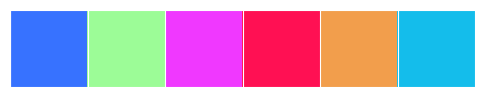

In [27]:
colors = ["#3772FF", "#9CFC97", "#F038FF", "#FF1053", "#F29E4C", "#14BDEB"]
colorPallet = sns.set_palette(colors)
sns.palplot(sns.color_palette())
plt.show()